[-9.40968016e-17  1.23932373e-17 -3.99337646e-17]
[1. 1. 1.]


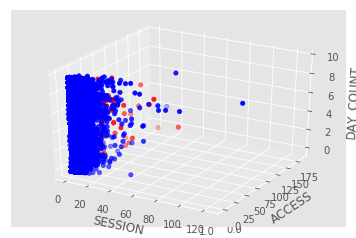

In [4]:
import numpy as np
import os
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


"""
# データの形(例)

UID, ACCESS, SESSION, DAY_COUNT, CV(0: NO, 1: CV)
201802010000, 1, 3, 10, 1
201802010001, 1, 3, 10, 0

"""

data = np.genfromtxt(os.path.join('train_data', 'detail.tsv'), delimiter='\t')
X = data[:, (1, 2, 3)]
t = data[:, 4]

# 標準化(0~1の範囲に収まるようにする)
X = preprocessing.scale(X)

# CVユーザは赤、NON CVは青でプロット
def plot_data(X, t):
    cv = [i for i in range(len(t)) if t[i] == 1]
    non_cv = [i for i in range(len(t)) if t[i] == 0]
    plt.style.use('ggplot')    
    fig = plt.figure(1)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[cv, 0], X[cv, 1], X[cv, 2], c='red', marker='o', label='cv')
    ax.scatter(X[non_cv, 0], X[non_cv, 1], X[non_cv, 2], c='blue', marker='o', label='non_cv')
    ax.set_xlabel('SESSION')
    ax.set_ylabel('ACCESS')
    ax.set_zlabel('DAY_COUNT')

plot_data(X, t)


In [24]:
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

"""
# データの形(例)

UID, ACCESS, SESSION, DAY_COUNT, CV(0: NO, 1: CV)
201802010000, 1, 3, 10, 1
201802010001, 1, 3, 10, 0

"""

# SESSION, ACCESS, DAY_COUNTを説明変数, CVを目的変数に設定
data = np.genfromtxt(os.path.join('train_data', 'detail.tsv'), delimiter='\t')
X = data[:, (1, 2, 3)] 
t = data[:, 4]

#交差検証(学習データとテスト用のデータに分ける)
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=1) 
train_index, test_index = next(ss.split(X, t))

# ロジスティック回帰分析を用いてモデルの構築
X_train, X_test = X[train_index], X[test_index]
t_train, t_test = t[train_index], t[test_index]
clf = LogisticRegression()
clf.fit(X_train, t_train)

# 学習データとテストデータの精度を表示
print(clf.score(X_train, t_train))
print(clf.score(X_test, t_test))

0.9977819049878118
0.9976633155684754
